In [266]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from datetime import datetime
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV

%matplotlib inline

In [267]:
train = pd.read_csv("C:/MyData/hub_project/AV Hack/AVHiringHack/train.csv")
test = pd.read_csv("C:/MyData/hub_project/AV Hack/AVHiringHack/test.csv")
print("train.shape" + str(train.shape))
print("test.shape" + str(test.shape))

train.shape(26496, 8)
test.shape(8568, 7)


In [268]:
train.columns

Index(['ID', 'datetime', 'temperature', 'var1', 'pressure', 'windspeed',
       'var2', 'electricity_consumption'],
      dtype='object')

In [269]:
train.head(5)

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [270]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
ID                         26496 non-null int64
datetime                   26496 non-null object
temperature                26496 non-null float64
var1                       26496 non-null float64
pressure                   26496 non-null float64
windspeed                  26496 non-null float64
var2                       26496 non-null object
electricity_consumption    26496 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB
None


In [271]:
train.describe(include="all")

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
count,26496.000000,26496,26496.000000,26496.000000,26496.000000,26496.000000,26496,26496.000000
unique,NaN,26496,NaN,NaN,NaN,NaN,3,NaN
top,NaN,2014-05-18 06:00:00,NaN,NaN,NaN,NaN,A,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,25239,NaN
mean,17455.500000,NaN,5.098989,-1.916233,986.450615,23.959956,NaN,298.359601
std,10122.873673,NaN,8.682860,10.424860,12.002647,48.280321,NaN,108.020555
min,0.000000,NaN,-17.100000,-32.900000,953.000000,1.075000,NaN,174.000000
25%,8717.750000,NaN,-2.900000,-10.700000,978.000000,3.155000,NaN,219.000000
50%,17435.500000,NaN,6.400000,-1.400000,986.000000,6.545000,NaN,267.000000
75%,26177.250000,NaN,12.100000,7.900000,995.000000,22.260000,NaN,342.000000


In [272]:
test.describe(include="all")

,ID,datetime,temperature,var1,pressure,windspeed,var2
count,8568.000000,8568,8568.000000,8568.000000,8568.000000,8568.000000,8568
unique,NaN,8568,NaN,NaN,NaN,NaN,3
top,NaN,2016-04-25 13:00:00,NaN,NaN,NaN,NaN,A
freq,NaN,1,NaN,NaN,NaN,NaN,8177
mean,17766.525210,NaN,5.112757,-1.726401,986.329599,24.176398,NaN
std,10117.296415,NaN,8.606167,10.345034,12.148517,49.651535,NaN
min,552.000000,NaN,-17.900000,-26.400000,954.000000,1.075000,NaN
25%,9317.750000,NaN,-2.100000,-10.000000,977.000000,3.155000,NaN
50%,18083.500000,NaN,5.700000,-2.100000,987.000000,6.295000,NaN
75%,26297.250000,NaN,12.100000,7.900000,995.000000,21.907500,NaN


In [273]:
test['electricity_consumption'] = -99
test.columns

Index(['ID', 'datetime', 'temperature', 'var1', 'pressure', 'windspeed',
       'var2', 'electricity_consumption'],
      dtype='object')

In [ ]:
'''cor_plot_columns=['temperature','var1','pressure','windspeed','electricity_consumption']
colormap = plt.cm.RdBu
plt.figure(figsize=(10,5))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.loc[:,cor_plot_columns].astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
'''

In [ ]:
'''g = sns.pairplot(train.iloc[:,1:], palette = 'seismic',size=3,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])
'''

In [280]:
def string_to_day(my_string):
    if '-' in my_string:
        return calendar.day_name[datetime.strptime(my_string, "%Y-%m-%d %H:%M:%S").weekday()]

train['day'] = train['datetime'].apply(lambda x: string_to_day(x))
test['day'] = test['datetime'].apply(lambda x: string_to_day(x))

In [281]:
def string_to_year(my_string):
    if '-' in my_string:
        return datetime.strptime(my_string, "%Y-%m-%d %H:%M:%S").year

train['year'] = train['datetime'].apply(lambda x: string_to_year(x))
test['year'] = test['datetime'].apply(lambda x: string_to_year(x))

In [282]:
def string_to_month(my_string):
    if '-' in my_string:
        return datetime.strptime(my_string, "%Y-%m-%d %H:%M:%S").month

train['month'] = train['datetime'].apply(lambda x: string_to_month(x))
test['month'] = test['datetime'].apply(lambda x: string_to_month(x))

In [283]:
def string_to_date(my_string):
    if '-' in my_string:
        return datetime.strptime(my_string, "%Y-%m-%d %H:%M:%S").day

train['date'] = train['datetime'].apply(lambda x: string_to_date(x))
test['date'] = test['datetime'].apply(lambda x: string_to_date(x))

In [284]:
def string_to_hour(my_string):
    if '-' in my_string:
        return datetime.strptime(my_string, "%Y-%m-%d %H:%M:%S").hour

train['hour'] = train['datetime'].apply(lambda x: string_to_hour(x))
test['hour'] = test['datetime'].apply(lambda x: string_to_hour(x))

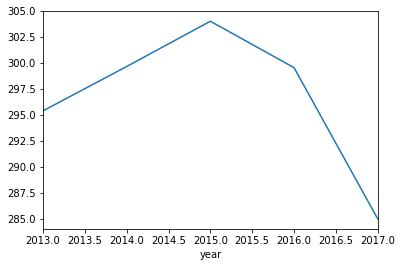

In [285]:
train.groupby(['year'])["electricity_consumption"].mean().plot()

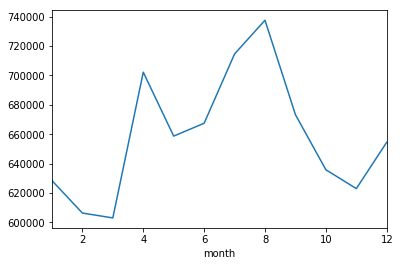

In [286]:
train.groupby('month')["electricity_consumption"].sum().plot()

In [287]:
train["month_wise_demand"] = np.where(train['month'].isin([1,2,3,10,11,12]), 'low', 'high')
test["month_wise_demand"] = np.where(test['month'].isin([1,2,3,10,11,12]), 'low', 'high')

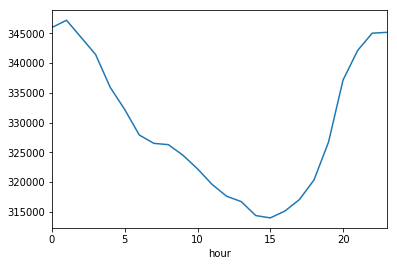

In [288]:
train.groupby('hour')["electricity_consumption"].sum().plot()

In [289]:
train["hour_wise_demand"] = np.where(train['hour'].isin([0,1,2,3,4,5,20,21,22,23]), 'high', 'low')
test["hour_wise_demand"] = np.where(test['hour'].isin([0,1,2,3,4,5,20,21,22,23]), 'high', 'low')

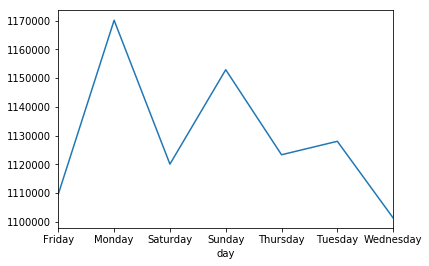

In [290]:
train.groupby('day')["electricity_consumption"].sum().plot()

In [291]:
train["day_wise_demand"] = np.where(train['day'].isin(['Sunday','Monday']), 'high', 'low')
test["day_wise_demand"] = np.where(test['day'].isin(['Sunday','Monday']), 'high', 'low')

In [292]:
train.columns

Index(['ID', 'datetime', 'temperature', 'var1', 'pressure', 'windspeed',
       'var2', 'electricity_consumption', 'day', 'year', 'month', 'date',
       'hour', 'month_wise_demand', 'hour_wise_demand', 'day_wise_demand'],
      dtype='object')

In [293]:
test.columns

Index(['ID', 'datetime', 'temperature', 'var1', 'pressure', 'windspeed',
       'var2', 'electricity_consumption', 'day', 'year', 'month', 'date',
       'hour', 'month_wise_demand', 'hour_wise_demand', 'day_wise_demand'],
      dtype='object')

In [294]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 16 columns):
ID                         26496 non-null int64
datetime                   26496 non-null object
temperature                26496 non-null float64
var1                       26496 non-null float64
pressure                   26496 non-null float64
windspeed                  26496 non-null float64
var2                       26496 non-null object
electricity_consumption    26496 non-null float64
day                        26496 non-null object
year                       26496 non-null int64
month                      26496 non-null int64
date                       26496 non-null int64
hour                       26496 non-null int64
month_wise_demand          26496 non-null object
hour_wise_demand           26496 non-null object
day_wise_demand            26496 non-null object
dtypes: float64(5), int64(5), object(6)
memory usage: 3.2+ MB


In [295]:
allData = pd.concat([train,test],axis=0)

In [ ]:
#allData.sort_values(by = 'datetime', ascending=True, inplace=True)
#allData['temperature_lag']=allData['temperature'].shift(1)

In [296]:
list_of_clumnNames= ['var2','day','month', 'hour','month_wise_demand', 'hour_wise_demand', 'day_wise_demand']
for column in list_of_clumnNames:
    dummies = pd.get_dummies(allData[column],prefix=column+'_')
    allData = pd.concat([allData,dummies],axis=1)
allData.columns

Index(['ID', 'datetime', 'temperature', 'var1', 'pressure', 'windspeed',
       'var2', 'electricity_consumption', 'day', 'year', 'month', 'date',
       'hour', 'month_wise_demand', 'hour_wise_demand', 'day_wise_demand',
       'var2__A', 'var2__B', 'var2__C', 'day__Friday', 'day__Monday',
       'day__Saturday', 'day__Sunday', 'day__Thursday', 'day__Tuesday',
       'day__Wednesday', 'month__1', 'month__2', 'month__3', 'month__4',
       'month__5', 'month__6', 'month__7', 'month__8', 'month__9', 'month__10',
       'month__11', 'month__12', 'hour__0', 'hour__1', 'hour__2', 'hour__3',
       'hour__4', 'hour__5', 'hour__6', 'hour__7', 'hour__8', 'hour__9',
       'hour__10', 'hour__11', 'hour__12', 'hour__13', 'hour__14', 'hour__15',
       'hour__16', 'hour__17', 'hour__18', 'hour__19', 'hour__20', 'hour__21',
       'hour__22', 'hour__23', 'month_wise_demand__high',
       'month_wise_demand__low', 'hour_wise_demand__high',
       'hour_wise_demand__low', 'day_wise_demand__high',
 

In [297]:
allData.drop(['ID','datetime','var2','day','month', 'hour']+list_of_clumnNames, axis=1,inplace =True)
train_t = allData[allData['electricity_consumption'] != -99]
test_t = allData[allData['electricity_consumption'] == -99]
print(train_t.shape)
print(test_t.shape)

(26496, 59)
(8568, 59)


In [298]:
X = train_t.drop(['electricity_consumption'], axis=1)
y = train_t.loc[:,'electricity_consumption']

X_train = X[X['date'].isin(list(range(1,21)))]
X_val = X[X['date'].isin(['21', '22', '23'])] 
y_train = train_t[train_t['date'].isin(list(range(1,21)))].loc[:,'electricity_consumption']
y_val = train_t[train_t['date'].isin(['21', '22', '23'])].loc[:,'electricity_consumption']

X_test = test_t.drop(['electricity_consumption'], axis=1)
X_test = test_t.drop(['electricity_consumption'], axis=1)
X_test = test_t.drop(['electricity_consumption'], axis=1)

In [299]:
print(print(X.shape))
print(print(y.shape))
print(print(X_train.shape))
print(print(y_train.shape))
print(print(X_val.shape))
print(print(y_val.shape))
print(print(X_test.shape))

(26496, 58)
None
(26496,)
None
(23040, 58)
None
(23040,)
None
(3456, 58)
None
(3456,)
None
(8568, 58)
None


In [337]:
grid_values = {'learning_rate': [0.2], 'max_depth': [4],'max_features': [15]}
gbregr = GradientBoostingRegressor(random_state = 99)
grid_gbregr = GridSearchCV(gbregr, param_grid = grid_values, scoring = make_scorer(mean_squared_error), cv = 3, verbose = 1)
grid_gbregr.fit(X_train, y_train)

means = grid_gbregr.cv_results_['mean_test_score']
stds = grid_gbregr.cv_results_['std_test_score']
params = grid_gbregr.cv_results_['params']
for mean, std, params in zip(means, stds, params): 
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

print("Best parameters set found on development set:",grid_gbregr.best_params_)

y_true, y_pred = y_val, grid_gbregr.predict(X_val)
print(sqrt(mean_squared_error(y_true, y_pred)))

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s finished


7221.713 (+/-355.282) for {'learning_rate': 0.2, 'max_depth': 4, 'max_features': 15}
Best parameters set found on development set: {'learning_rate': 0.2, 'max_depth': 4, 'max_features': 15}
92.44966725821435


In [338]:
y_true, y_pred = y, grid_gbregr.predict(X)
print(sqrt(mean_squared_error(y_true, y_pred)))

68.86019320980247


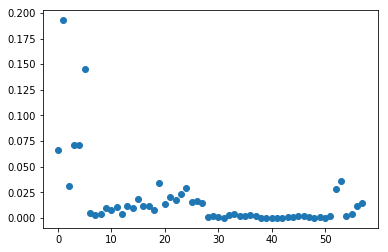

In [385]:
gbModel = GradientBoostingRegressor(learning_rate = 0.2, max_depth = 4, max_features = 15)
gbModel.fit(X, y)
plt.plot(gbModel.feature_importances_, 'o')

In [343]:
y_test_gbregr_pred = gbModel.predict(X_test)
y_test_gbregr_pred

array([ 252.74782341,  249.7434312 ,  281.95031604, ...,  207.16791218,
        220.77774303,  204.91081345])

In [386]:
test['electricity_consumption'] = y_test_gbregr_pred
test.loc[:,['ID','electricity_consumption']].to_csv('C:/MyData/hub_project/AV Hack/AVHiringHack/GBMSubmission.csv',header=True,sep=',',index=False)

In [377]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

nnregr = MLPRegressor(hidden_layer_sizes = [59,45,29,18,9,5], validation_fraction=0.1,activation ='relu',learning_rate_init=0.008, learning_rate='adaptive',alpha =30, random_state = 99, solver='lbfgs', verbose=1, early_stopping=True)
nnregr.fit(X_train_scaled, y_train)

y_true, y_pred = y_train, nnregr.predict(X_train_scaled)
print("Training error: "+str(sqrt(mean_squared_error(y_true, y_pred))))
y_true, y_pred = y_val, nnregr.predict(X_val_scaled)
print("Testing error: "+str(sqrt(mean_squared_error(y_true, y_pred))))

Training error: 67.00133039863262
Testing error: 97.21918928045771


In [378]:
y_test_nnregr_pred = nnregr.predict(X_test_scaled)
test['electricity_consumption'] = y_test_nnregr_pred
test.loc[:,['ID','electricity_consumption']].to_csv('C:/MyData/hub_project/AV Hack/AVHiringHack/NNSubmission.csv',header=True,sep=',',index=False)

In [379]:
test['electricity_consumption'] = (y_test_gbregr_pred + y_test_nnregr_pred)/2
test.loc[:,['ID','electricity_consumption']].to_csv('C:/MyData/hub_project/AV Hack/AVHiringHack/NNXGBSubmission.csv',header=True,sep=',',index=False)

In [380]:
gbModel = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, max_features = 20)
gbModel.fit(X, y)
y_test_gbregr_pred2 = gbModel.predict(X_test)

In [381]:
gbModel = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 1, max_features = 30)
gbModel.fit(X, y)
y_test_gbregr_pred3 = gbModel.predict(X_test)

In [384]:
test['electricity_consumption'] = (y_test_gbregr_pred + y_test_gbregr_pred2 + y_test_gbregr_pred3)/3
test.loc[:,['ID','electricity_consumption']].to_csv('C:/MyData/hub_project/AV Hack/AVHiringHack/3XGBSubmission.csv',header=True,sep=',',index=False)